<a href="https://colab.research.google.com/github/Bruce-159/-Pattern-recognition-HW/blob/main/HW04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 46ms/step - loss: 0.5121 - accuracy: 0.7821 - val_loss: 0.4195 - val_accuracy: 0.8282
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3058 - accuracy: 0.9017 - val_loss: 0.3033 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2239 - accuracy: 0.9264 - val_loss: 0.2806 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1763 - accuracy: 0.9421 - val_loss: 0.2744 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1453 - accuracy: 0.9531 - val_loss: 0.2997 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1193 - accuracy: 0.9633 - val_loss: 0.3158 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1005 - accuracy: 0.9703 - val_loss: 0.3226 - val_accuracy: 0.8806
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

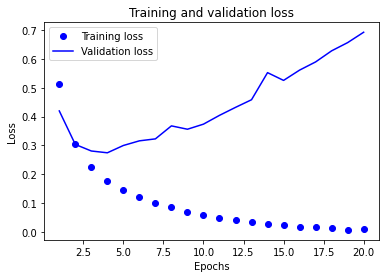

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

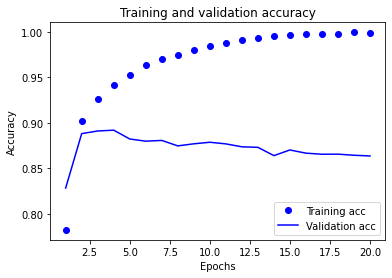

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4800 - accuracy: 0.8135
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2717 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2080 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2861 - accuracy: 0.8862


In [17]:
results

[0.28607675433158875, 0.8862400054931641]

In [18]:
model.predict(x_test)

array([[0.20282856],
       [0.998505  ],
       [0.8949005 ],
       ...,
       [0.14464003],
       [0.08540624],
       [0.6408948 ]], dtype=float32)

In [19]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [24]:
train_labels[10]

3

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.6613 - accuracy: 0.5009 - val_loss: 1.7570 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4346 - accuracy: 0.7020 - val_loss: 1.3134 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0635 - accuracy: 0.7746 - val_loss: 1.1297 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8365 - accuracy: 0.8213 - val_loss: 1.0269 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6624 - accuracy: 0.8576 - val_loss: 0.9613 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5272 - accuracy: 0.8896 - val_loss: 0.9181 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4213 - accuracy: 0.9117 - val_loss: 0.8952 - val_accuracy: 0.8130
Epoch 8/20
16

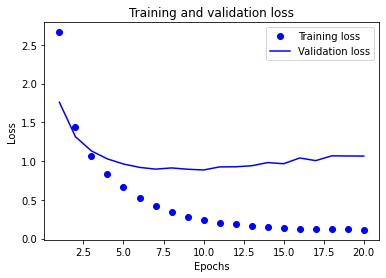

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

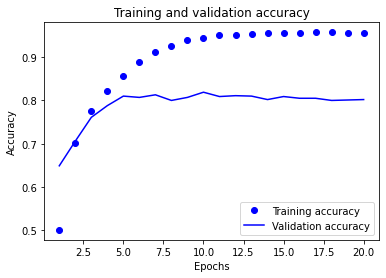

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 40ms/step - loss: 2.5928 - accuracy: 0.5285
Epoch 2/9
18/18 [==============================] - 1s 40ms/step - loss: 1.3752 - accuracy: 0.7152
Epoch 3/9
18/18 [==============================] - 1s 55ms/step - loss: 1.0134 - accuracy: 0.7821
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7852 - accuracy: 0.8351
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.6206 - accuracy: 0.8701
Epoch 6/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4915 - accuracy: 0.8985
Epoch 7/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3972 - accuracy: 0.9146
Epoch 8/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3262 - accuracy: 0.9300
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9480 - accuracy: 0.7916


In [35]:
results

[0.9479754567146301, 0.7916295528411865]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

In [37]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [38]:
np.sum(predictions[0])

1.0

In [39]:
np.argmax(predictions[0])

3

In [40]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 3.2983 - accuracy: 0.1483 - val_loss: 2.8206 - val_accuracy: 0.2190
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 2.4410 - accuracy: 0.2954 - val_loss: 2.0368 - val_accuracy: 0.5360
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.6989 - accuracy: 0.5879 - val_loss: 1.6328 - val_accuracy: 0.5980
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4047 - accuracy: 0.6463 - val_loss: 1.5093 - val_accuracy: 0.6400
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.2546 - accuracy: 0.6916 - val_loss: 1.4508 - val_accuracy: 0.6520
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1505 - accuracy: 0.7063 - val_loss: 1.4205 - val_accuracy: 0.6560
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0749 - accuracy: 0.7141 - val_loss: 1.4249 - val_accuracy: 0.6540
Epoch 8/20
63

In [42]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [43]:
train_data.shape

(404, 13)

In [44]:
test_data.shape

(102, 13)

In [45]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [46]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [47]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [48]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [49]:
all_scores

[1.9164869785308838, 2.4874751567840576, 2.545269012451172, 2.524075746536255]

In [50]:
np.mean(all_scores)

2.368326723575592

In [51]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [52]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

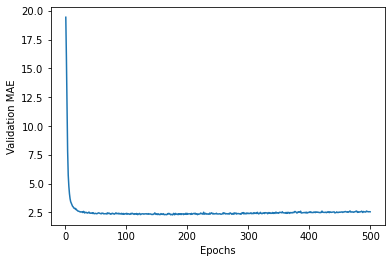

In [53]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

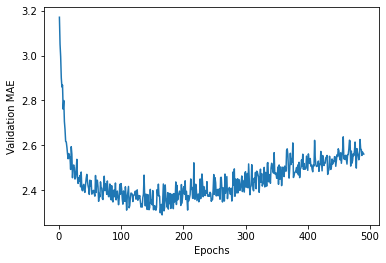

In [54]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [55]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.2018 - mae: 2.4439


In [56]:
test_mae_score

2.443887233734131

In [57]:
predictions = model.predict(test_data)
predictions[0]

array([7.386069], dtype=float32)